### Load libraries 

- Aim of the work is to build a model that can predict median housing values for houses in california
- So that we can apply the model to any house coming up for sale to decide up on fair opening house price
- The price depends on age of the house, prices of other houses  around and many more factors which we would explore in EDA


In [6]:
import os
from urllib.request import urlretrieve
import tarfile

import pandas as pd

In [7]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

### fetch the housing data

In [30]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

### load the the data 

In [70]:
def load_housing_data(housing_path = HOUSING_PATH):
    return (pd.read_csv(os.path.join(housing_path, "housing.csv")))

In [71]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [73]:
housing.shape


(20640, 10)

In [74]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


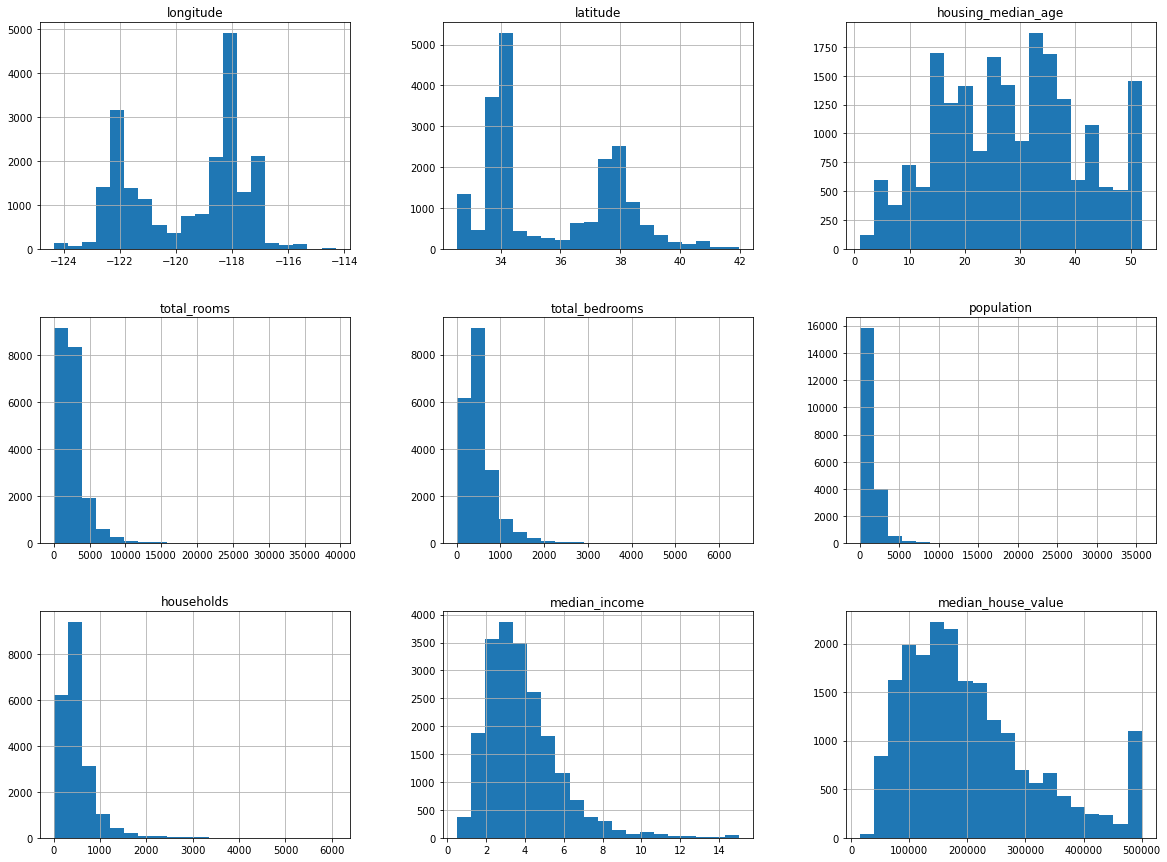

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=20, figsize=(20,15))
plt.show()

### Set ID column

In [76]:
housing_data_withid = housing.reset_index()
(housing_data_withid.head())

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Median income seems to be most important to business

<AxesSubplot:>

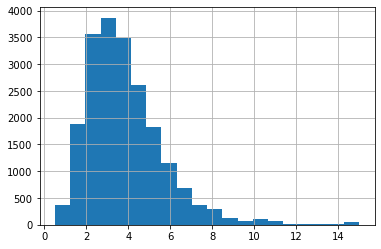

In [77]:
housing.median_income.hist(bins=20)

In [80]:
#----------- convert it to buckets based on distribution : 1.5 to 6 = most distribution
#---- why should i categorize? : i need to make sure my test set contains various categories of income 
# Once we convert it to categories, would do a stratified sampling based on the categories
import numpy as np
housing["income_cat"] = pd.cut(housing.median_income, bins=[0,1.5,3,4.5,6,np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

### Stratified Sampling

In [241]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size =0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [82]:
strat_train_set.income_cat.value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [83]:
strat_test_set.income_cat.value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [84]:
housing.income_cat.value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

### Income category : drop 

In [85]:
# Now that the purpose of income category is fullfilled, lets drop it both from train and test 
for df in (strat_train_set, strat_test_set):
    df.drop("income_cat", axis=1, inplace=True)


### Exploring Train data 

In [86]:
housing_train = strat_train_set.copy()
housing_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1010: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scatter = ax.scatter(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

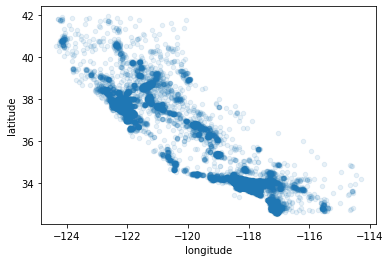

In [87]:
housing_train.plot(kind= "scatter", x= "longitude", y= "latitude", Alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

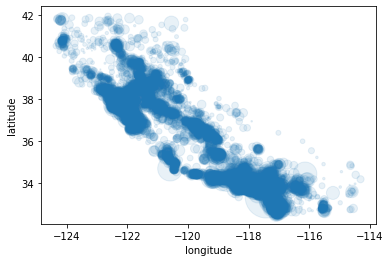

In [88]:
housing_train.plot(kind= "scatter", x= "longitude", y= "latitude", Alpha=0.1,
                  s= housing_train.population/20,
                  )

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

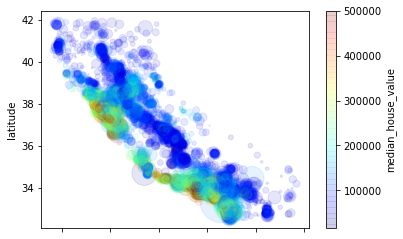

In [89]:
housing_train.plot(kind= "scatter", x= "longitude", y= "latitude", Alpha=0.1,
                  s= housing_train.population/20,
                 c= "median_house_value",cmap = plt.get_cmap("jet"), colorbar=True
                  )

In [90]:
housing_train.corr().median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

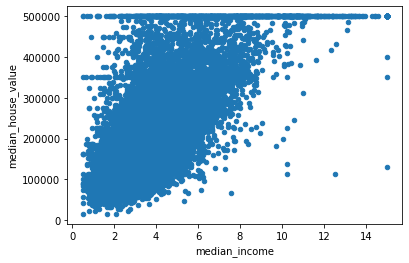

In [91]:
#--- lets look at most corr col

housing_train.plot(kind= "scatter", x= "median_income", y = "median_house_value")

we see here that the values at 500k are capped.
The algorithm may not be able to learn what are the  
feature that would attribute to median housing price >500k. 
So we may drop those entries as per business's requirements

### Creatiing new features

### Create train data and label

In [92]:
housing_train_data = housing_train.drop("median_house_value", axis=1)
housing_train_label = housing_train.median_house_value.copy()

In [93]:
type(housing_train_label)

pandas.core.series.Series

In [94]:
type( housing_train["median_house_value"].copy())

pandas.core.series.Series

### Data Cleaning 

In [95]:
#NA treatment 
print(housing_train_data.isna().sum())
print (housing_train_data.dtypes)


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")  # only on numerical fields

housing_train_data_numerics = housing_train_data.drop("ocean_proximity",axis=1)
imputer.fit(housing_train_data_numerics)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object


SimpleImputer(strategy='median')

### Categorical and text value treatment

In [96]:
print(type(housing_train_data.ocean_proximity))
print(type(housing_train_data[["ocean_proximity"]]))



<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Problem with ordinal encoder is that it make ML model to assumee relationship between the categories.
Such as 1 and 2 are more closely related to each other than 1 and 4 as per distance. One hot encoder is a loution for this issue.
One hot encoder may slow down  the training due to large categories in the data, in columns with 1000 categories.

### best programming method is to create your own estimator and transformer
### we can do this for extra feature creation

In [97]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix , brdroom_ix, population_ix , households_ix = 3,4,5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room= True):
        self.add_bedrooms_per_room= add_bedrooms_per_room
        
    def fit(self, X,y=None):
        return self
        
    def transform(self, X):
        rooms_per_household = X[:,room_ix]/ X[:,households_ix]
        population_per_household = X[:, population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            return np.c_[X, rooms_per_household,population_per_household,add_bedrooms_per_room ]
        else :
            return np.c_[X, rooms_per_household,population_per_household ]

        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)
housing_extra_Attribs = attr_adder.transform(housing_train_data.values)
        

### Data imputation, encoding all these can be build by a pipeline

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline([
    ("imputer",  SimpleImputer(strategy = "median")),
     ("attr_adder", CombinedAttributesAdder(add_bedrooms_per_room= False)),
     ("std_scalar", StandardScaler()),
    
])

numeric_pipeline.fit_transform(housing_train_data_numerics)

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.61493744,
        -0.31205452, -0.08649871],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  1.33645936,
         0.21768338, -0.03353391],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.5320456 ,
        -0.46531516, -0.09240499],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.3167053 ,
         0.3469342 , -0.03055414],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.09812139,
         0.02499488,  0.06150916],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.15779865,
        -0.22852947, -0.09586294]])

In [99]:
(housing_train_data.shape)
housing_train_data_numerics.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

### Categorical and numeric pipelines together

In [108]:
# Categorical and numeric pipelines together
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


features_num = housing_train_data_numerics.columns
features_cat = ["ocean_proximity"]

overall_pipeline = ColumnTransformer( [  
    ("num_pipeline" , numeric_pipeline, features_num),
    ("encoder" , OneHotEncoder(), features_cat )
    
])



housing_prepared_train = overall_pipeline.fit_transform(housing_train_data)

In [101]:
print(pd.DataFrame(housing_prepared_train).shape)
print((housing_train_label).shape)

(16512, 15)
(16512,)


In [111]:
housing_prepared_train

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

###  Train the model

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_train,housing_train_label)

LinearRegression()

In [123]:
some_train = strat_train_set.iloc[:5]
# print((some_train.shape))

some_train_label  = housing_train_label[:5] 
some_train_prepared = overall_pipeline.transform(some_train)
# print(some_train_prepared)

print("predicated : ", lin_reg.predict(some_train_prepared))
print("actual : ", list(some_train_label))

predicated :  [211888.26540421 321274.25149998 210853.46010112  62261.10820843
 194921.76527689]
actual :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


the results are almost same . lets look at the metrices

In [127]:
from sklearn.metrics import mean_squared_error


housing_preds = lin_reg.predict(housing_prepared_train)
lin_mse = mean_squared_error(housing_preds, housing_train_label)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68911.7605423384

In [133]:
# housing.describe()

Most of median house value is between 1,20k and 2,65k and  apred error of 68k is not good. model is underfitting. Features didi not provide enought info  about the problem.

### lets try DT and see meanwhile

In [138]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_train, housing_train_label)
pred_tree = tree_reg.predict(housing_prepared_train)


from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(pred_tree, housing_train_label)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


- This can't be possible at all. 
- The explanation is that the model has badly overfit the data. 
- We need to look at better evaluation metrics for the model.


### better evaluation using cross validation 

In [149]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_reg, housing_prepared_train,housing_train_label, scoring = "neg_mean_squared_error", cv= 10)

tree_rmse_scores = np.sqrt(-score)
print("RMSE           : ", tree_rmse_scores)
print("Mean           : ", tree_rmse_scores.mean())
print("Std            : ", tree_rmse_scores.std())


RMSE           :  [70229.09085166 67189.05560629 67431.63360183 69624.88507597
 70727.34158223 74330.30233999 71335.37281616 71923.56039628
 76352.01678591 69287.69158029]
Mean           :  70843.09506365955
Std            :  2705.5935600739135


now, the performance is not zero. but it looks bad. 70k error is not acceptable. Lets try RF

### Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_train, housing_train_label)


RandomForestRegressor()

In [153]:
pred_forest = forest_reg.predict(housing_prepared_train)

score = cross_val_score(forest_reg, housing_prepared_train, housing_train_label, 
                       scoring = "neg_mean_squared_error",
                       cv= 10)
tree_rmse_scores = np.sqrt(-score)
print("RMSE           : ", score)
print("Mean           : ", score.mean())
print("Std            : ", score.std())


RMSE           :  [-2.42239302e+09 -2.24495833e+09 -2.43354033e+09 -2.73503966e+09
 -2.45561717e+09 -2.90169803e+09 -2.40963334e+09 -2.29972533e+09
 -2.79257727e+09 -2.55894641e+09]
Mean           :  -2525412888.927323
Std            :  206144327.09820852


In [156]:
from sklearn.metrics import mean_squared_error
mse_forest = mean_squared_error(housing_train_label,pred_forest)
rmse_forest = np.sqrt(mse_forest)
print(rmse_forest)

18654.427426955703


### Saving the sample model

In [158]:
import joblib
joblib.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

In [159]:
forest_reg = joblib.load( "forest_reg.pkl")

### How to fine tune model

- Assuming  that we have some ML models shortlisted, let's tune  the model

In [169]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators" :[3,10,30],
             "max_features" : [2,4,6,8],
             "bootstrap" : [False] }
     ]


In [172]:
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring = "neg_mean_squared_error",
                          return_train_score= True)
grid_search.fit(housing_prepared_train, housing_train_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [174]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 30}

In [181]:
# grid_search.cv_results_["params"]
grid_search.cv_results_

{'mean_fit_time': array([0.21118536, 0.76212258, 2.24014211, 0.36199365, 1.20001178,
        3.6022419 , 0.49538307, 1.65300636, 4.73237057, 0.61395559,
        2.00281878, 6.13971777]),
 'std_fit_time': array([0.03244846, 0.01266329, 0.07425911, 0.00959578, 0.02018618,
        0.0284559 , 0.01277019, 0.03680222, 0.17997191, 0.00836306,
        0.11512439, 0.47721861]),
 'mean_score_time': array([0.00986462, 0.02603197, 0.0662466 , 0.00624261, 0.02216735,
        0.06319532, 0.00644436, 0.02107124, 0.05997782, 0.00815353,
        0.02281976, 0.0681427 ]),
 'std_score_time': array([0.00806688, 0.0070559 , 0.00680326, 0.00764561, 0.00801959,
        0.00059617, 0.00789879, 0.00569333, 0.01455195, 0.00288372,
        0.00306712, 0.00700102]),
 'param_bootstrap': masked_array(data=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
              mask=[False, False, False, False, False, False, False, False,
                    False, Fal

In [189]:
gs = grid_search.cv_results_
for mean_score, params in zip(gs["mean_test_score"], gs["params"]):
    print(np.sqrt(-mean_score), params)

61167.08167279409 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54058.5015729152 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
51349.34683783016 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
58877.697201669835 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51299.3280732415 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
49316.319002664124 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
56078.59589581089 {'bootstrap': False, 'max_features': 6, 'n_estimators': 3}
50811.1120549979 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
49190.18174993344 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
57089.36490010019 {'bootstrap': False, 'max_features': 8, 'n_estimators': 3}
50842.53712959392 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
49309.34333026553 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}


In [195]:
grid_search.best_estimator_.feature_importances_

array([9.14109716e-02, 8.96862696e-02, 4.45688613e-02, 1.75399394e-02,
       1.70203517e-02, 1.78171183e-02, 1.66984150e-02, 3.51229720e-01,
       8.87487400e-02, 1.07420397e-01, 8.78295277e-03, 1.39328543e-01,
       5.97139669e-05, 3.26634137e-03, 6.42166482e-03])

In [237]:
#need to find column  names in the training data . that includes  newly created columns , cat columns and numeric columns


cat_encoder = overall_pipeline.named_transformers_["encoder"]
cat_one_hot_attributes = list(cat_encoder.categories_[0])
new_attribs = ["rooms_per_household","population_per_household" ] 
attributes = list(features_num)  + new_attribs + cat_one_hot_attributes
#["rooms_per_household", "bedrooms_per_hosehold", "bedrooms_per_room"]

sorted(zip(grid_search.best_estimator_.feature_importances_, attributes), reverse=True)




[(0.3512297198134524, 'median_income'),
 (0.13932854290227764, 'INLAND'),
 (0.10742039739525129, 'population_per_household'),
 (0.09141097163777877, 'longitude'),
 (0.08968626962802433, 'latitude'),
 (0.08874873995201932, 'rooms_per_household'),
 (0.04456886127516904, 'housing_median_age'),
 (0.01781711832538722, 'population'),
 (0.01753993944630724, 'total_rooms'),
 (0.01702035171690667, 'total_bedrooms'),
 (0.016698414970501993, 'households'),
 (0.008782952774103818, '<1H OCEAN'),
 (0.006421664821931766, 'NEAR OCEAN'),
 (0.003266341373956522, 'NEAR BAY'),
 (5.971396693206782e-05, 'ISLAND')]

Ocean proximity seems to be a usefull variable . we may drop some unimportant features at this moment

### Evaluating the model

In [244]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [246]:
X_test_prepared =  overall_pipeline.transform(X_test)

final_preds=  final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_preds)
final_rmse = np.sqrt(final_mse)
final_rmse

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


46723.31488713131

How do we know that this is better or not.?? 

- To be sure lets calculate a confidence interval of 95% where i can be sure of telling that :
- my result will be in this range 95% of the time

In [250]:
from scipy import stats 
confidence = 0.95
squared_error = (final_preds-y_test)**2
np.sqrt(stats.t.interval(confidence,
                         len(squared_error)-1, 
                        loc = squared_error.mean(),
                        scale = stats.sem(squared_error)))    

array([44698.33293264, 48664.10731871])

In [263]:
print(housing_train_label.median(),final_preds.mean(),
      ((housing_train_label.median()-final_preds.mean())/(final_preds.mean())))
final_rmse
print(housing_train_label.median(),final_rmse,
      ((housing_train_label.median()-final_rmse)/(housing_train_label.median())))

179500.0 207376.57739825582 -0.13442490829000575
179500.0 46723.31488713131 0.7397029811301877


In [252]:
sorted(zip(final_preds, y_test))

[(48783.333333333336, 49800.0),
 (48913.333333333336, 50100.0),
 (50026.666666666664, 54800.0),
 (50076.666666666664, 51700.0),
 (50346.666666666664, 49100.0),
 (50520.0, 46800.0),
 (50816.666666666664, 45300.0),
 (51790.0, 51400.0),
 (51866.666666666664, 40900.0),
 (51950.0, 48500.0),
 (52203.333333333336, 53000.0),
 (52400.0, 53400.0),
 (52413.333333333336, 42700.0),
 (52490.0, 56500.0),
 (52496.666666666664, 47100.0),
 (52560.0, 50800.0),
 (52686.666666666664, 53000.0),
 (52743.333333333336, 51800.0),
 (52930.0, 57400.0),
 (52999.96666666667, 53100.0),
 (53060.0, 50800.0),
 (53360.0, 58300.0),
 (53416.666666666664, 67800.0),
 (53420.0, 52300.0),
 (53936.666666666664, 43300.0),
 (54020.0, 51200.0),
 (54430.0, 51600.0),
 (54923.333333333336, 106300.0),
 (55136.666666666664, 55300.0),
 (55160.0, 59000.0),
 (55336.666666666664, 60500.0),
 (55456.666666666664, 42500.0),
 (55540.0, 55100.0),
 (55940.0, 68900.0),
 (56273.333333333336, 110400.0),
 (56323.333333333336, 51600.0),
 (56400.0, 4

- Prediction error of 40k i also not good compared to median house values in training data 
- but still better compared LR rmse
- END OF ANALYSIS

##### extra analysis

In [219]:
overall_pipeline.named_transformers_
list(cat_encoder.categories_[0])
features_num


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [206]:
housing_train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

### train test split

In [48]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 24) 

In [62]:
(test_set)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3950,-118.62,34.20,23.0,3098.0,542.0,1486.0,492.0,5.7613,235800.0,<1H OCEAN
3113,-117.66,35.62,11.0,5897.0,1138.0,2728.0,1072.0,4.1500,85700.0,INLAND
10347,-117.66,33.61,21.0,1932.0,266.0,860.0,286.0,7.1497,274000.0,<1H OCEAN
6971,-118.03,33.99,52.0,2792.0,461.0,1177.0,439.0,3.4312,243800.0,<1H OCEAN
10940,-117.88,33.75,10.0,1823.0,590.0,2176.0,548.0,1.5026,151800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10658,-117.83,33.66,16.0,1574.0,385.0,515.0,363.0,5.3423,291700.0,<1H OCEAN
8833,-118.37,34.09,31.0,6348.0,1827.0,2559.0,1755.0,3.2818,225000.0,<1H OCEAN
918,-121.95,37.52,33.0,3994.0,764.0,2721.0,763.0,5.2308,196900.0,<1H OCEAN
6098,-117.87,34.11,34.0,1324.0,211.0,799.0,228.0,4.5234,192200.0,<1H OCEAN
